In [2]:
import numpy as np
# matplotlib.use('Agg')
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
import os
import random
from collections import defaultdict, OrderedDict
import json
from tqdm import tqdm
import sys
from IPython.display import display

In [3]:
coco_annotation_file_path = "/media/ian/WD/datasets/retail_product_checkout/instances_train2019.json"
COCO_TRAIN = COCO(annotation_file=coco_annotation_file_path)
with open(coco_annotation_file_path) as fid:
    train_json_data = json.load(fid)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [4]:
coco_annotation_file_path = "/media/ian/WD/datasets/retail_product_checkout/instances_val2019.json"
COCO_VAL = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [5]:
# compare_catIds = [i for i in range(1, 201)]
# cats = COCO_VAL.loadCats(compare_catIds)
# cat_names = [cat["name"] for cat in cats]
# print("Categories Names:")
# print(cat_names)

In [6]:
# COCO_VAL.anns[7358]

In [7]:
val_mask_root = '/media/ian/WD/datasets/retail_product_checkout/val2019_anns_mask'
val_size_dict = {}  # val2019 data,
for cat in tqdm(range(1, 201)):
    # ======== synthesized =========
    # annIds = coco_ann_check.getAnnIds(catIds=[cat])
    # anns = coco_ann_check.loadAnns(annIds)
    # box_sizes = []
    # for ann in anns:
    #     box_sizes.append(ann['bbox'][2]*ann['bbox'][3])
    # box_sizes = np.array(box_sizes)
    # syn_avg = np.average(box_sizes)
    # ======== synthesized =========
    # # ======== val2019 =========
    # annIds = COCO_VAL.getAnnIds(catIds=[cat])
    # anns = COCO_VAL.loadAnns(annIds)
    # box_sizes = []
    # for ann in anns:
    #     box_sizes.append(ann['bbox'][2] * ann['bbox'][3])
    # box_sizes = np.array(box_sizes)
    # val_avg = np.max(box_sizes)
    # val_size_dict[cat] = val_avg
    # # ===========================
    areas = []
    anns = COCO_VAL.loadAnns(COCO_VAL.getAnnIds(catIds=[cat]))
    for ann in anns:
        mask_path = os.path.join(val_mask_root, "{}.png".format(ann['id']))
        mask = Image.open(mask_path).convert('L')
        area = np.array(mask, dtype=bool).sum()
        areas.append(area)
    areas = np.array(areas)
    val_size_dict[cat] = np.average(areas)
print(val_size_dict)
# print("cat ID: {}, val_avg/syn_avg:{}".format(cat, (val_avg/(syn_avg)+1)))

100%|██████████| 200/200 [08:26<00:00,  2.53s/it]

{1: 152835.06746031746, 2: 149370.87885985748, 3: 182207.0608695652, 4: 191160.8924050633, 5: 226722.77809798272, 6: 191704.1339491917, 7: 191179.00430107527, 8: 183890.0406976744, 9: 182419.8422535211, 10: 204200.84520884522, 11: 212112.41619585687, 12: 152210.98493975904, 13: 222332.667673716, 14: 222221.40694006308, 15: 232811.45933014355, 16: 226462.69487750556, 17: 174177.88937093277, 18: 287205.73579545453, 19: 184974.26455026455, 20: 172571.78827361565, 21: 173362.46329113925, 22: 418810.5778546713, 23: 300972.62413793104, 24: 405270.1216216216, 25: 513309.2697368421, 26: 401782.2371794872, 27: 373461.85745140386, 28: 296358.1587677725, 29: 160034.08913649025, 30: 166185.24210526317, 31: 68802.98507462686, 32: 67075.33435582822, 33: 59190.74074074074, 34: 61524.99742268041, 35: 47807.89164785553, 36: 73645.86163522012, 37: 299134.152173913, 38: 66287.47222222222, 39: 108209.54294478528, 40: 62990.92230576441, 41: 62585.55510204082, 42: 141685.40789473685, 43: 138838.79224376733,

In [8]:
train_images = {}
for x in train_json_data['images']:
    train_images[x['id']] = x

train_annotations = {}
for x in train_json_data['annotations']:
    train_annotations[train_images[x['image_id']]['file_name']] = x

object_category_paths = defaultdict(list)
for img_id, info in COCO_TRAIN.imgs.items():
    name = info['file_name']
    category = train_annotations[name]['category_id']
    object_category_paths[category].append(name)
object_category_paths = dict(object_category_paths)

train_size_dict = {}
for category, paths in tqdm(object_category_paths.items()):
    areas = []
    for object_path in paths:
        x, y, w, h = train_annotations[object_path]['bbox']
        area = w * h
        # mask_path = os.path.join('./', 'extracted_masks_tracer5_morph10', 'masks',
        #                          '{}.png'.format(name.split('.')[0]))
        # mask = Image.open(mask_path).convert('L')
        # mask.crop((int(x),int(y),int(x+w),int(y+h)))
        # area = np.array(mask, dtype=bool).sum()

        areas.append(area)  # instance area
    areas = np.array(areas)
    max_area = areas.max()
    train_size_dict[category] = max_area
train_size_dict = OrderedDict(sorted(train_size_dict.items()))
print(train_size_dict)

100%|██████████| 200/200 [00:00<00:00, 6851.87it/s]

OrderedDict([(1, 1008226.7227999999), (2, 786811.1155999999), (3, 990287.2823999999), (4, 1109249.253), (5, 1302978.9136), (6, 1171277.3632), (7, 1040575.4550000002), (8, 1087979.3272), (9, 1044027.5040000001), (10, 1225663.6414), (11, 1183664.0235), (12, 874487.1468), (13, 1016364.3581000001), (14, 1232356.5756), (15, 1316481.0174), (16, 1082054.064), (17, 872300.652), (18, 1361679.28), (19, 886463.8265999999), (20, 727157.9575), (21, 727791.277), (22, 2143853.3735999996), (23, 1651119.9396), (24, 2252734.9807), (25, 2612830.5392), (26, 2070585.2355), (27, 2268452.4555), (28, 1456733.4288), (29, 792415.3839), (30, 829601.98), (31, 364088.5655), (32, 405815.20450000005), (33, 284124.1018), (34, 294827.616), (35, 241957.61880000003), (36, 319877.3785), (37, 1667984.6894), (38, 384005.79199999996), (39, 555313.2336), (40, 316913.479), (41, 327318.11340000003), (42, 761565.2544), (43, 674168.1673999999), (44, 798583.0103000001), (45, 318531.88680000004), (46, 363838.61009999993), (47, 464

In [9]:
COCO_TRAIN.loadCats([1])[0]

{'supercategory': 'puffed_food', 'id': 1, 'name': '1_puffed_food'}

In [13]:
import math

train_val_ratio = OrderedDict()
for i in range(1, 201):
    train_val_ratio[i] = round(math.sqrt(val_size_dict[i]) / math.sqrt(train_size_dict[i]) - 0.1, 3)
    # train_val_ratio[i] = round(val_size_dict[i] / train_size_dict[i], 3)
    print("id:{}, cat:{}, ratio:{}".format(i, COCO_TRAIN.loadCats([i])[0]['supercategory'], train_val_ratio[i]))
with open('train_val_ratio.json', 'w') as fid:
    json.dump(train_val_ratio, fid)

id:1, cat:puffed_food, ratio:0.289
id:2, cat:puffed_food, ratio:0.336
id:3, cat:puffed_food, ratio:0.329
id:4, cat:puffed_food, ratio:0.315
id:5, cat:puffed_food, ratio:0.317
id:6, cat:puffed_food, ratio:0.305
id:7, cat:puffed_food, ratio:0.329
id:8, cat:puffed_food, ratio:0.311
id:9, cat:puffed_food, ratio:0.318
id:10, cat:puffed_food, ratio:0.308
id:11, cat:puffed_food, ratio:0.323
id:12, cat:puffed_food, ratio:0.317
id:13, cat:dried_fruit, ratio:0.368
id:14, cat:dried_fruit, ratio:0.325
id:15, cat:dried_fruit, ratio:0.321
id:16, cat:dried_fruit, ratio:0.357
id:17, cat:dried_fruit, ratio:0.347
id:18, cat:dried_fruit, ratio:0.359
id:19, cat:dried_fruit, ratio:0.357
id:20, cat:dried_fruit, ratio:0.387
id:21, cat:dried_fruit, ratio:0.388
id:22, cat:dried_food, ratio:0.342
id:23, cat:dried_food, ratio:0.327
id:24, cat:dried_food, ratio:0.324
id:25, cat:dried_food, ratio:0.343
id:26, cat:dried_food, ratio:0.341
id:27, cat:dried_food, ratio:0.306
id:28, cat:dried_food, ratio:0.351
id:29, c

In [31]:
# annIds = coco_ann_val.getAnnIds(catIds=compare_catIds)
# anns = coco_ann_val.loadAnns(annIds)
# box_sizes = []
# for ann in anns:
#     box_sizes.append(ann['bbox'][2]*ann['bbox'][3])
# box_sizes = np.array(box_sizes)
# val_avg = np.average(box_sizes)
# print(val_avg/syn_avg)

2.0217493119472993


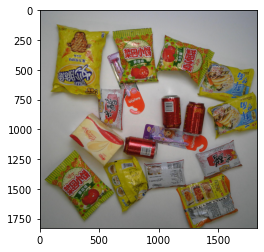

In [6]:
# img_info = coco_ann_val.loadImgs(coco_ann_val.getImgIds(catIds=[2])[50])[0]
# im = Image.open(os.path.join('/media/ian/WD/datasets/retail_product_checkout/val2019', img_info['file_name']))
# plt.imshow(im)

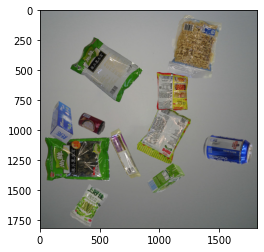

In [5]:
# img_info = coco_ann_check.loadImgs(coco_ann_check.getImgIds(catIds=[1])[50])[0]
# im = Image.open(os.path.join('/media/ian/WD/datasets/rpc_list/synthesize_3000_test', img_info['file_name']))
# plt.imshow(im)